In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [3]:
df = pd.read_csv("bank_preprocessed.csv")

# Ensure all data is numeric
df = df.apply(pd.to_numeric, errors='coerce')
df.dropna(inplace=True)  # Drop any rows with NaN values

# Separate features and target
X = df.drop(columns=['y']).values  # Features
y = df['y'].values  # Target

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [4]:
# Train Decision Tree model
dt = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=42)
dt.fit(X_train, y_train)

# Make predictions
y_pred = dt.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Decision Tree Accuracy: {accuracy:.4f}')

# Classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Decision Tree Accuracy: 0.8974

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.97      0.94      7952
           1       0.65      0.33      0.44      1091

    accuracy                           0.90      9043
   macro avg       0.78      0.65      0.69      9043
weighted avg       0.88      0.90      0.88      9043



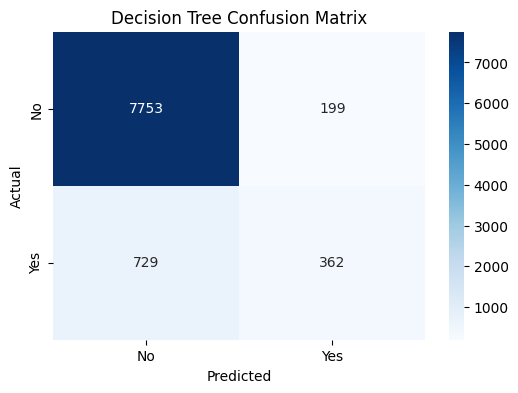

In [5]:
# Plot Confusion Matrix
plt.figure(figsize=(6, 4))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Decision Tree Confusion Matrix")
plt.show()

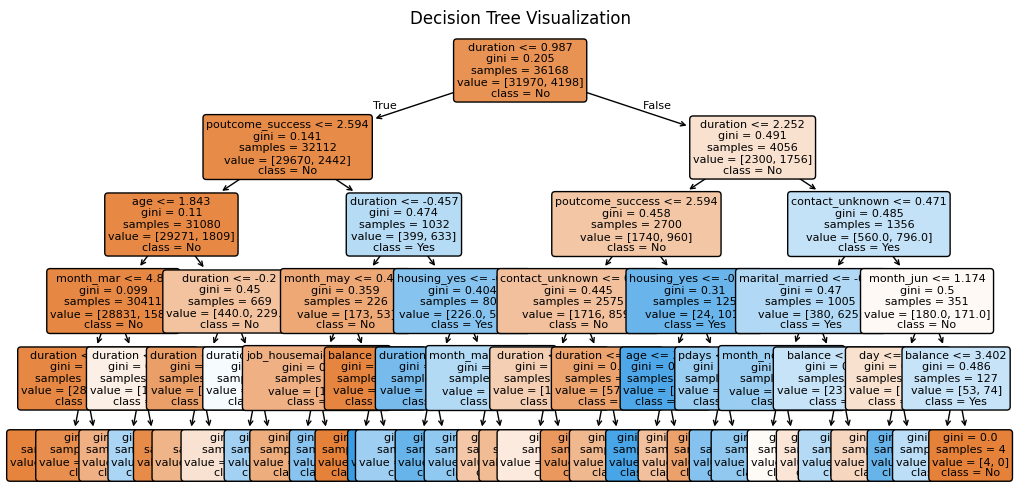

In [6]:
# Plot Decision Tree Structure
plt.figure(figsize=(12, 6))
plot_tree(dt, feature_names=df.drop(columns=['y']).columns, class_names=["No", "Yes"], filled=True, rounded=True, fontsize=8)
plt.title("Decision Tree Visualization")
plt.show()

In [7]:
# Plot Accuracy vs. Tree Depth
depth_values = range(1, 21)
accuracy_scores = []

for depth in depth_values:
    dt = DecisionTreeClassifier(criterion='gini', max_depth=depth, random_state=42)
    dt.fit(X_train, y_train)
    y_pred_depth = dt.predict(X_test)
    accuracy_scores.append(accuracy_score(y_test, y_pred_depth))

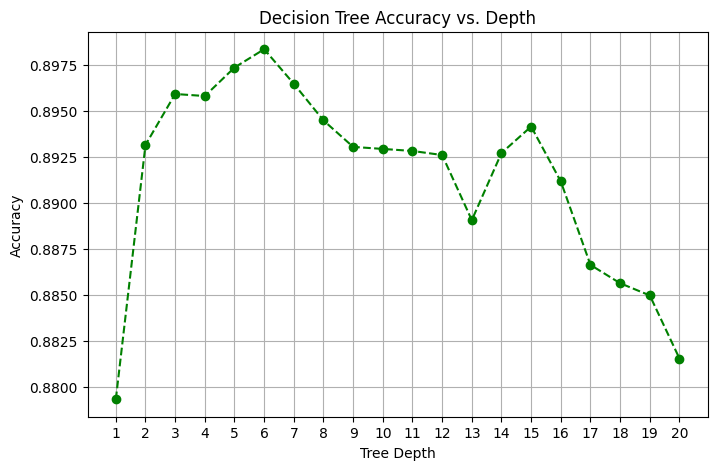

In [8]:
plt.figure(figsize=(8, 5))
plt.plot(depth_values, accuracy_scores, marker='o', linestyle='dashed', color='g')
plt.xlabel("Tree Depth")
plt.ylabel("Accuracy")
plt.title("Decision Tree Accuracy vs. Depth")
plt.xticks(depth_values)
plt.grid(True)
plt.show()